#Creando Nombres

In [ ]:
import pandas as pd

In [ ]:
nombres_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=M&qtd=200")
nombres_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?sexo=F&qtd=200")

In [ ]:
type(nombres_f)

pandas.core.frame.DataFrame

In [ ]:
print("Cantidad de nombres :" + str(len(nombres_m) + len(nombres_f)))

Cantidad de nombres :400


In [ ]:
frames = [nombres_m, nombres_f]
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [ ]:
nombres = pd.concat(frames)['nome'].to_frame()
nombres.columns = ['nombre']
nombres.sample(5)

,nombre
140,NILSON
149,ISRAEL
98,THAIS
10,LUIS
154,SIDNEI


In [ ]:
nombres.sample(5)

,nombre
128,EDVALDO
180,LIDIA
117,WAGNER
170,ALEXANDRO
37,EDSON


#Incluyendo ID de alumnos

In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)

In [ ]:
total_alumnos = len(nombres)
total_alumnos

400

In [ ]:
nombres['id_alumno'] = np.random.permutation(total_alumnos) + 1
nombres.sample(5)

,nombre,id_alumno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [ ]:
dominios = ['@dominiodeemail.com', '@serviciodeemail.com']

In [ ]:
nombres['dominio'] = np.random.choice(dominios, total_alumnos)
nombres.sample(5)

,nombre,id_alumno,dominio
84,FATIMA,78,@dominiodeemail.com
0,MARIA,331,@serviciodeemail.com
179,LILIANE,340,@dominiodeemail.com
10,LUIS,174,@dominiodeemail.com
171,VALDEMIR,45,@dominiodeemail.com


In [ ]:
nombres['email'] = nombres.nombre.str.cat(nombres.dominio).str.lower()
nombres.sample(5)

,nombre,id_alumno,dominio,email
114,ELZA,320,@dominiodeemail.com,elza@dominiodeemail.com
57,IGOR,303,@serviciodeemail.com,igor@serviciodeemail.com
85,FABRICIO,221,@dominiodeemail.com,fabricio@dominiodeemail.com
183,MARLON,8,@dominiodeemail.com,marlon@dominiodeemail.com
189,WESLEI,137,@dominiodeemail.com,weslei@dominiodeemail.com


#Creando Cursos

In [ ]:
import html5lib

In [ ]:
url = 'https://www.tiobe.com/tiobe-index/'

In [ ]:
cursos = pd.read_html(url)
cursos

[    Jun 2023  Jun 2022  Change  Programming Language Programming Language.1  \
 0          1         1     NaN                   NaN                 Python   
 1          2         2     NaN                   NaN                      C   
 2          3         4     NaN                   NaN                    C++   
 3          4         3     NaN                   NaN                   Java   
 4          5         5     NaN                   NaN                     C#   
 5          6         6     NaN                   NaN           Visual Basic   
 6          7         7     NaN                   NaN             JavaScript   
 7          8        13     NaN                   NaN                    PHP   
 8          9         8     NaN                   NaN                    SQL   
 9         10         9     NaN                   NaN      Assembly language   
 10        11        12     NaN                   NaN   Delphi/Object Pascal   
 11        12        24     NaN         

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[2].iloc[:,:1]
cursos = cursos.rename(columns={'Programming Language': 'Nome do curso'})
cursos

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head()

,Nome do curso
0,Python
1,C
2,Java
3,C++
4,C#


#Adicionando Index

In [ ]:
cursos = cursos.rename(columns={'Nome do curso' : 'nombre_curso'})

In [ ]:
cursos['id'] = cursos.index + 1
cursos

,nombre_curso,id
0,Python,1
1,C,2
2,Java,3
3,C++,4
4,C#,5
5,Visual Basic,6
6,JavaScript,7
7,SQL,8
8,Assembly language,9
9,PHP,10


In [ ]:
cursos = cursos.set_index('id')
cursos.head()

,nombre_curso
id,
1,Python
2,C
3,Java
4,C++
5,C#


In [ ]:
cursos.shape

(15, 1)

#Matriculando Alumnos

In [ ]:
nombres['matriculas'] = np.ceil(np.random.exponential(size=total_alumnos)*1.5).astype(int)
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [ ]:
nombres.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

<ipython-input-32-68059771b3aa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nombres.matriculas)


<Axes: xlabel='matriculas', ylabel='Density'>

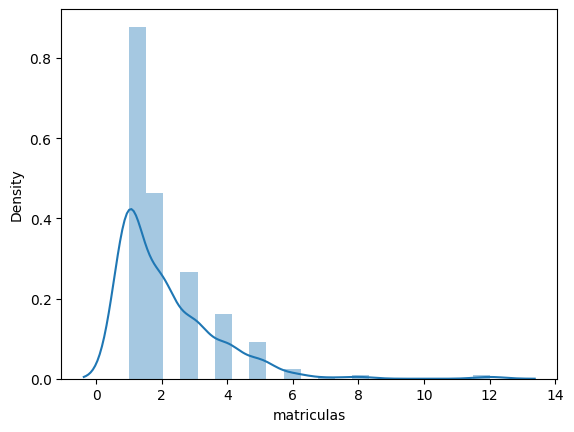

In [ ]:
sns.distplot(nombres.matriculas)

In [ ]:
nombres.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

#Seleccionando Alumnos

In [ ]:
nombres.head()

,nombre,id_alumno,dominio,email,matriculas
0,JOSE,235,@dominiodeemail.com,jose@dominiodeemail.com,1
1,JOAO,43,@serviciodeemail.com,joao@serviciodeemail.com,1
2,ANTONIO,304,@serviciodeemail.com,antonio@serviciodeemail.com,5
3,FRANCISCO,156,@dominiodeemail.com,francisco@dominiodeemail.com,5
4,CARLOS,343,@serviciodeemail.com,carlos@serviciodeemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(len(cursos))
prob = x / sum(x)
prob

array([1.46161251e-01, 2.21709910e-02, 7.39424417e-02, 3.68571153e-02,
       1.33195632e-01, 7.24203839e-02, 2.42538134e-05, 4.68571962e-02,
       3.62717508e-02, 1.33396093e-02, 9.47045583e-02, 6.01152599e-02,
       3.90601547e-02, 1.67113253e-01, 5.77661486e-02])

In [ ]:
for index, row in nombres.iterrows():
  id = row.id_alumno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index , p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_alumno', 'id_curso'])
matriculas.head()

,id_alumno,id_curso
0,235,1
1,43,8
2,304,14
3,304,14
4,304,2


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nombre_curso'])[['nombre_curso', 'id_alumno']].rename(columns={'id_alumno':'Total'}).sort_values('Total', ascending = False)
matriculas_por_curso

,nombre_curso,Total
id_curso,,
14,Pascal,150
1,Python,135
5,C#,99
11,Objective-C,90
3,Java,67
12,Ada,60
6,Visual Basic,53
4,C++,41
8,SQL,40


#Salida en diferentes formatos

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
matriculas_por_curso.to_json('matriculas_por_curso.json')

In [ ]:
matriculas_por_curso.to_html('matriculas_por_curso.html', index = False)

#Creando Banco SQL

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [ ]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

14

In [ ]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']


#Buscando en Banco SQL

In [ ]:
query = 'select * from matriculas where total < 20'

In [ ]:
pd.read_sql(sql = text(query), con=engine.connect())

,id_curso,nombre_curso,Total
0,2,C,18
1,10,PHP,7


In [ ]:
muchas_matriculas = pd.read_sql_table('matriculas', con=engine.connect(), columns=['nombre_curso', 'Total'])
muchas_matriculas

In [ ]:
muchas_matriculas = muchas_matriculas.query('Total > 80')
muchas_matriculas

,nombre_curso,Total
0,Pascal,150
1,Python,135
2,C#,99
3,Objective-C,90


#Escribiendo en el Banco SQL

In [ ]:
muchas_matriculas.to_sql('muchas_matriculas', engine)

4

In [ ]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas', 'muchas_matriculas']


#Nombres para el Ingreso

In [ ]:
matriculas.sample(5)

,id_alumno,id_curso
226,39,18
13,310,15
830,58,5
368,82,2
506,152,18


In [ ]:
id_curso = 16
proxima_clase = matriculas.query('id_curso == {}'.format(id_curso))
proxima_clase

,id_alumno,id_curso
44,10,16
59,49,16
68,172,16
109,259,16
159,212,16
196,381,16
337,153,16
339,153,16
428,38,16
498,336,16


In [ ]:
proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()


,nombre
id_alumno,
10,RODRIGO
38,ALVARO
49,LEONARDO
153,JAIME
153,JAIME
172,ANDERSON
212,HENRIQUE
251,CRISTINA
259,GERALDO


In [ ]:
nombre_aula = cursos.loc[id_curso]
nombre_aula

nombre_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nombre_aula = nombre_aula.nombre_curso
nombre_aula

'Estatística básica'

In [ ]:
proxima_clase = proxima_clase.set_index('id_alumno').join(nombres.set_index('id_alumno'))['nombre'].to_frame()

In [ ]:
proxima_clase = proxima_clase.rename(columns={'nombre': 'Alumnos del curso de {}'.format(nombre_aula)})
proxima_clase.sample(5)

,Alumnos del curso de Estatística básica
id_alumno,
49,LEONARDO
315,LILIAN
38,ALVARO
336,JOSEFA
251,CRISTINA


#Excel

In [ ]:
proxima_clase.to_excel('proxima_clase.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_clase.xlsx')

,Alumnos del curso de Estatística básica
0,RODRIGO
1,ALVARO
2,LEONARDO
3,JAIME
4,JAIME
5,ANDERSON
6,HENRIQUE
7,CRISTINA
8,GERALDO
9,ROBERTA
